In [5]:
#library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#calling the data
#this data obtained from Kaggle
df = pd.read_csv("C:/Users/LENOVO/DA_Portfolio/dfTransjakarta.csv")

In [7]:
#exploring the raw data as a table
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [8]:
#exploring the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [9]:
#data cleansing

#first, we check the 'null' data
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [10]:
#based on the previous line, we can see that there's a lot of null data
#second, we clean the null data by replacing it
def checknull(data):
    if data.isna().sum().any():
        data.dropna(inplace=True)
    else:
        pass
    
#we recheck it again after replacing the null values
checknull(df)
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

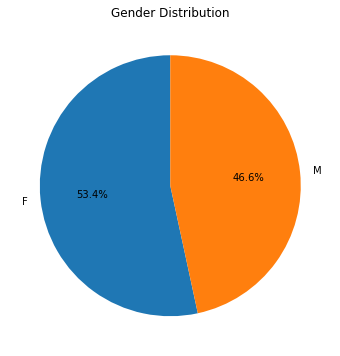

In [11]:
#now the values are replaced, and this dataset is clean! We can proceed to the next step

#third,I want to show you the passengers personal data
#gender
#for gender, we replace the string: M and F to numeric data, 0 for M and 1 for F
df['payCardSex'] = df['payCardSex'].replace({0: 'M', 1: 'F'})

#next, we count the gender and then visualize it
gender_count = df['payCardSex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

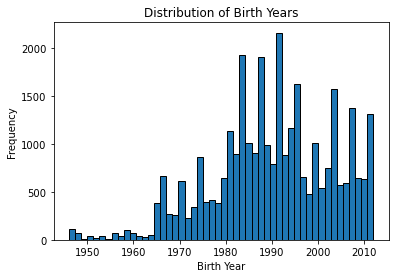

The highest: 1992
The lowest: 1954


In [12]:
#birth year data
plt.hist(df['payCardBirthDate'], bins=50, edgecolor='black')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.title('Distribution of Birth Years')
plt.show()

#details
by_counts = df['payCardBirthDate'].value_counts()
max_by_counts = by_counts.idxmax()
print(f"The highest: {max_by_counts}")
min_by_counts = by_counts.idxmin()
print(f"The lowest: {min_by_counts}")

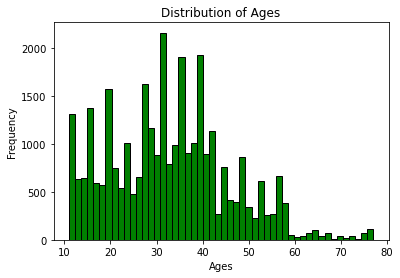

In [13]:
#by the birth year data, I want to create age data
#I assume the base year is 2023
base_year = 2023
df['ages'] = base_year - df['payCardBirthDate']

#visualize it
plt.hist(df['ages'], bins=50, edgecolor='black', color='green')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

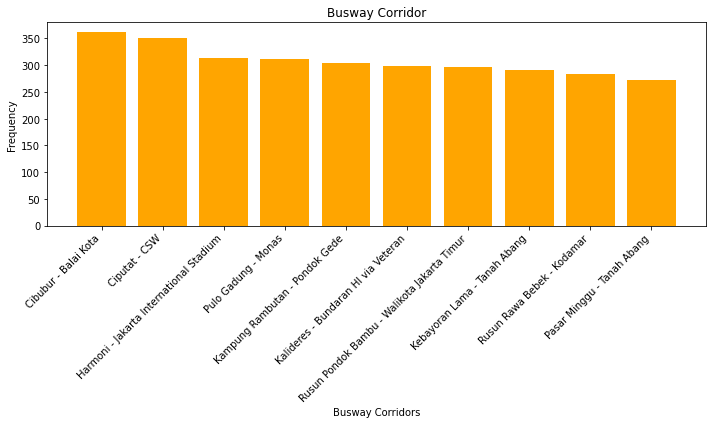

In [14]:
#next, I want to visualize the most visited busway corridor
corridor = df['corridorName'].value_counts()

#because there are a lot of busway corridor, I want to take the top 10 most active busway corridor
top10 = corridor.nlargest(10)

#visualize it
plt.figure(figsize=(10, 6))
plt.bar(top10.index, top10.values, color='orange')

plt.xlabel('Busway Corridors')
plt.ylabel('Frequency')
plt.title('Busway Corridor')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

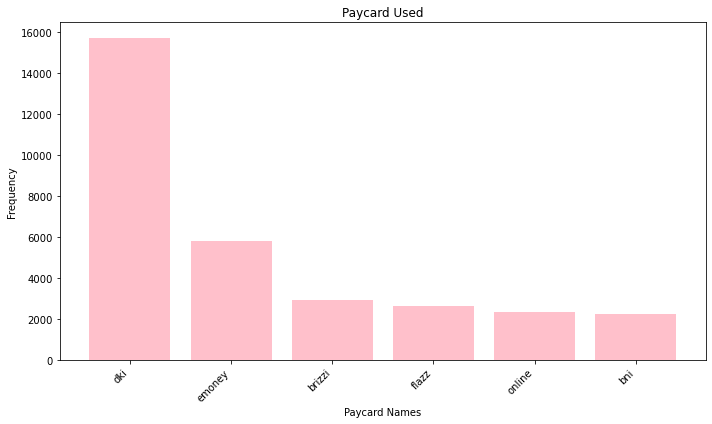

In [15]:
#next, I want to analyze the paycard
paycard = df['payCardBank'].value_counts()

#visualize it
plt.figure(figsize=(10, 6))
plt.bar(paycard.index, paycard.values, color='pink')

plt.xlabel('Paycard Names')
plt.ylabel('Frequency')
plt.title('Paycard Used')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

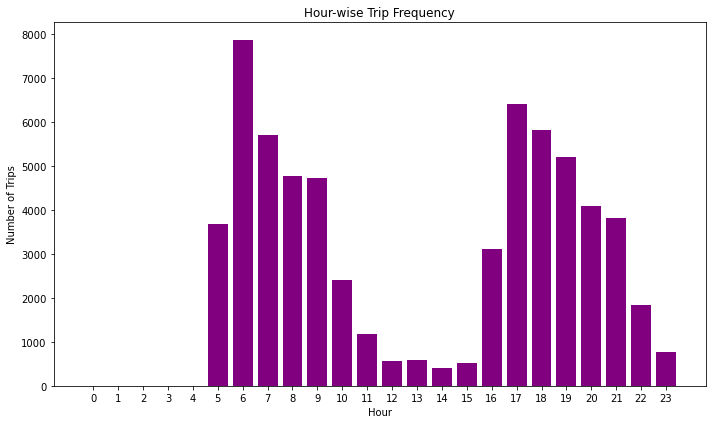

In [16]:
#Trip duration analysis
#Now, I want to analyze the trip duration analysis based on the time data
#First, we change the tapInTime and tapOutTime data to Pandas datetime format
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

#Second, we extract the hour
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour

#Third, we calculate the trip duration
all_trip_hours = pd.concat([df['tapInHour'], df['tapOutHour']])

hour_counts = all_trip_hours.value_counts()

hour_counts = hour_counts.sort_index()

# Create a bar chart to visualize the hour-wise trip frequency
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(hour_counts.index, hour_counts.values, color='purple')

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Hour-wise Trip Frequency')
plt.xticks(range(24))  # Set x-axis ticks to show all hours (0 to 23)

plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [27]:
#previous graph explain the trip frequency in a week
#I want to analyze each trip frequency each day to find the seasonality

#extract the day of the hour and week
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour
df['tapInDay'] = df['tapInTime'].dt.dayofweek
df['tapOutDay'] = df['tapOutTime'].dt.dayofweek

# Concatenate tap-in and tap-out data to get all trip data
all_trip_data = pd.concat([df[['tapInDay', 'tapInHour']], df[['tapOutDay', 'tapOutHour']]])

# Count the frequency of each day and hour combination
day_hour_counts = all_trip_data.value_counts()

# Map day of week integers to day names for labeling
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_hour_counts.index = day_hour_counts.index.map(lambda x: (day_names[x[0]], x[1]))

# Create a separate bar chart for each day
for day in day_names:
    day_data = day_hour_counts.xs(day)
    
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.bar(day_data.index, day_data.values, color='skyblue')
    
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Trips')
    plt.title(f'Trip Frequency - {day}')
    plt.xticks(range(24))  # Set x-axis ticks to show all hours (0 to 23)
    
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.show()

KeyError: 'Monday'